In [12]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
files = glob.glob('new_data/*.csv')

In [13]:
def pair_files():
    paired_files = []
    new_files = glob.glob('new_data/*.csv')
    old_files = glob.glob('old_data/*.csv')
    for file in new_files:
        id_old = file.split("/")[1].replace(".csv","").split("_")[1]
        for old_file in old_files:
            if "/"+id_old+"_" in old_file:
                paired_files.append([file,old_file])
    return paired_files
    

In [54]:
def create_user_df_2020(file):
    df = pd.read_csv(file)
    df= df[(df['years'] == 2020)&(df['source'] == 'youtube')]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.sort_values(by='datetime',ascending =True).reset_index()
    #print(file,"2020:",df.shape[0])
    return df

In [61]:
def create_user_df_2019(file):
    df = pd.read_csv(file)
    df= df[(df['years'] == 2019)&(df['source'] == 'youtube')]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.sort_values(by='datetime',ascending =True).reset_index()
    #print(file,"2019:",df.shape[0])
    return df

In [40]:
def create_burst_list(month_df):
    break_time_minutes = 5
    previous_row_set = False
    bursts = []
    for index, row in month_df.iterrows():
        if previous_row_set == True:
            eventTimeDif = (row.datetime - previous_row.datetime).seconds
            difComp = (60*break_time_minutes)
            if (eventTimeDif < difComp):
                bursts.append(row.datetime)
        previous_row_set = True
        previous_row = row
    return bursts

In [42]:
def burst_count_per_day(bursts):
    burstsByDay = {}
    for burst in bursts:
        if int(burst.date().strftime('%j')) in list(burstsByDay.keys()):
            burstsByDay[int(burst.date().strftime('%j'))] += 1
        else:
            burstsByDay[int(burst.date().strftime('%j'))] = 0
    return burstsByDay

In [44]:
def plot_dic(dic): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.rcParams["figure.figsize"] = (20,5)
    #plt.xticks(np.arange(0,20, 1.0))
    #plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    #plt.title('My title')
    #plt.xlabel('Week Number')
    #plt.ylabel(y_axis)
    
    #plt.ylim(0,y_lim)
    #plt.xlim(0,20)
    plt.show()


In [51]:
def plot_dic_two(dic,dictwo): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    liststwo = sorted(dictwo.items()) # sorted by key, return a list of tuples
    xtwo, ytwo = zip(*liststwo) # unpack a list of pairs into two tuples
    plt.rcParams["figure.figsize"] = (15,5)
    plt.plot(xtwo, ytwo)
    #plt.xticks(np.arange(0,20, 1.0))
    #plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    plt.xlabel('Day of Year (Out of 365)')
    plt.ylabel("Number of Bursts per Day")
    
    #plt.ylim(0,200)
    #plt.xlim(0,20)
    plt.show()

Starting...
Files Processed
{2: 117, 78: 228, 82: 294, 115: 323, 116: 249, 117: 340, 118: 144, 119: 204, 121: 230, 122: 260, 123: 234, 124: 231, 125: 321, 126: 228, 127: 217, 128: 205, 129: 229, 130: 318, 131: 215, 132: 298, 133: 391, 134: 365, 135: 315, 137: 461, 138: 233, 139: 247, 140: 269, 142: 251, 143: 185, 144: 210, 145: 255, 146: 171, 1: 48, 4: 121, 5: 155, 6: 90, 8: 90, 9: 106, 10: 113, 11: 68, 13: 82, 14: 82, 15: 92, 16: 166, 17: 212, 18: 228, 19: 113, 20: 122, 21: 131, 22: 117, 23: 192, 24: 151, 25: 99, 26: 105, 30: 91, 31: 94, 32: 207, 34: 97, 35: 168, 37: 119, 39: 181, 40: 157, 41: 178, 42: 159, 44: 125, 46: 142, 47: 117, 48: 159, 49: 97, 52: 113, 53: 256, 54: 267, 55: 144, 57: 78, 58: 74, 59: 107, 60: 223, 61: 141, 62: 177, 63: 180, 65: 177, 69: 171, 70: 131, 72: 97, 73: 125, 76: 165, 77: 182, 79: 196, 80: 289, 83: 225, 84: 157, 85: 188, 87: 197, 88: 190, 89: 144, 90: 194, 92: 116, 93: 153, 94: 232, 96: 159, 97: 207, 98: 301, 99: 181, 100: 206, 101: 223, 102: 216, 103: 40

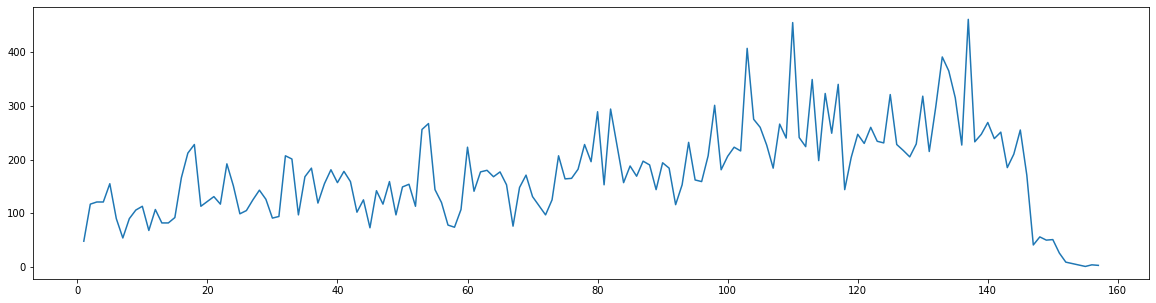

In [66]:
import pickle
user_total_sessions = []
print("Starting...")

for f in files:
    user_df = create_user_df_2020(f)
    user_sessions = create_burst_list(user_df)
    user_total_sessions += user_sessions
print("Files Processed")
    
burst_count_per_day_2020 = burst_count_per_day(user_total_sessions)
print(burst_count_per_day_2020)
pickle.dump(burst_count_per_day_2020, open( "bursts2020.p", "wb" ) )

plot_dic(burst_count_per_day_2020)

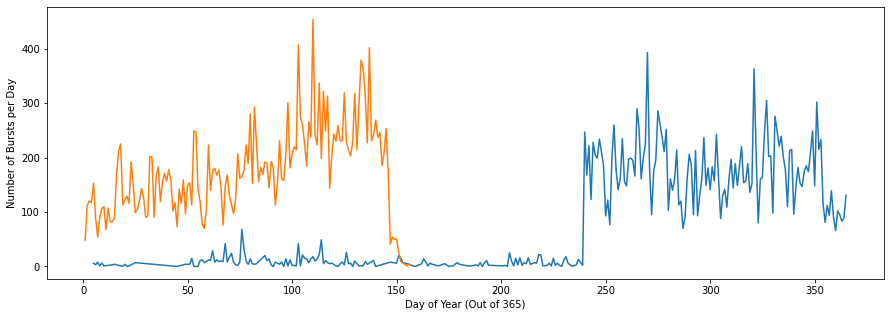

In [62]:
paired_files = pair_files()
user_total_bursts_2019 = []
user_total_bursts_2020 = []

for file_pair in paired_files:
    user_df_2019 = create_user_df_2019(file_pair[1])
    user_bursts_2019 = create_burst_list(user_df_2019)
    user_total_bursts_2019 += user_bursts_2019
    #print("2019:",len(user_sessions_2019))
    
    user_df_2020 = create_user_df_2020(file_pair[0])
    user_bursts_2020 = create_burst_list(user_df_2020)
    user_total_bursts_2020 += user_bursts_2020
    #print("2020:",len(user_sessions_2020))

    
#user_total_sessions_one = filter_sessions(user_total_sessions,2)
bursts_count_per_day_2019 = burst_count_per_day(user_total_bursts_2019)
bursts_count_per_day_2020 = burst_count_per_day(user_total_bursts_2020)
plot_dic_two(bursts_count_per_day_2019,bursts_count_per_day_2020)
